January: Extracting the ideal canyon rim using canyon and no-canyon bathymetries.

In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
from salishsea_tools.nc_tools import scDataset
import os,sys,fnmatch,time
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/transport_fluxes/')
import functions_transport_W
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions

colour_list = ["#c8274c","#f25546","#F06543","#e96e33","#f0b038","#FFE74C","#69b944","#72b286",
               "#69b0bc","#619ee4","#4b5bbb"][::-1]
cmap_iam = LinearSegmentedColormap.from_list('mycmap', colour_list, N=500, gamma=1)

In [2]:
dirname = '/ocean/imachuca/Canyons/results_mackenzie/idealized/sbcana_forcings/agrif_wind_timestep/'
filename = '1_mesh_mask.nc'
gdepw, tmask, mbathy, e1t, e2t = functions_transport_W.get_variables_planes(dirname, filename)

filename = '1_mesh_mask_nocanyon.nc'
gdepwn, tmaskn, mbathyn, e1tn, e2tn = functions_transport_W.get_variables_planes(dirname, filename)

bathy_file = nc.Dataset('/ocean/imachuca/Canyons/runs_mackenzie_canyon/runs/ideal_base/1_ideal_bathy_for_agrif.nc')
bathy = bathy_file['Bathymetry'][:]

T_file = nc.Dataset(dirname + '1_MCKNZ_1h_20170101_20170120_grid_T_20170103-20170103.nc')
salt = T_file['vosaline'][:]

W_file = nc.Dataset(dirname + '1_MCKNZ_1h_20170101_20170120_grid_W_20170103-20170103.nc')
wvel = W_file['vovecrtz'][:]

In [3]:
mbathy.shape, bathy.shape, salt.shape, wvel.shape

((272, 242), (274, 244), (24, 80, 274, 244), (24, 80, 274, 244))

In [4]:
mbathy_diff = mbathy - mbathyn

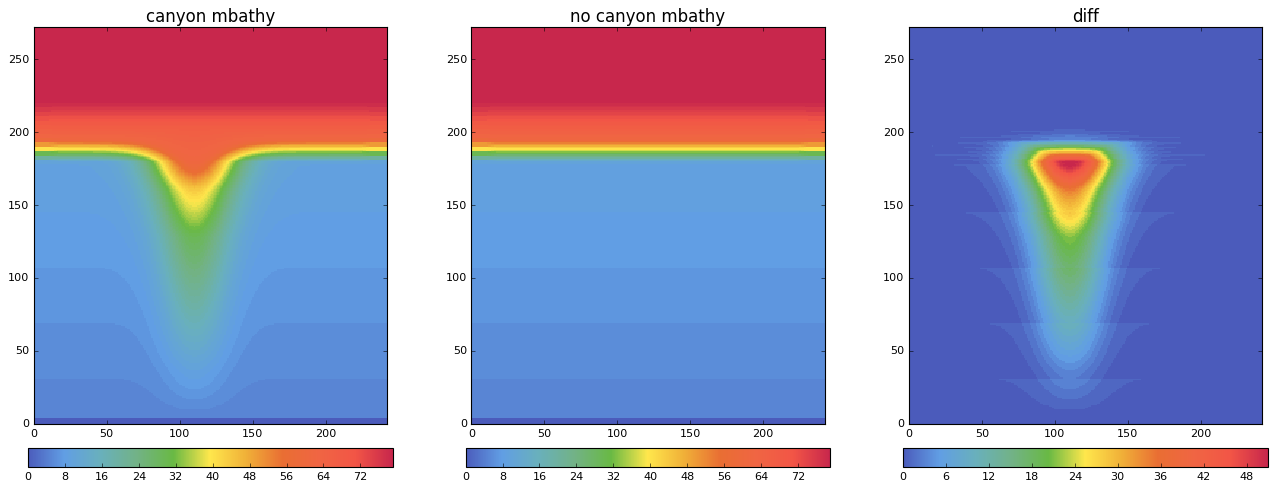

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20, 8))
p1 = ax1.pcolormesh(mbathy, cmap=cmap_iam)
p2 = ax2.pcolormesh(mbathyn, cmap=cmap_iam)
p3 = ax3.pcolormesh(mbathy_diff, cmap=cmap_iam)
for ax, p, ttl, n in zip([ax1, ax2, ax3], [p1, p2, p3], ['canyon mbathy', 'no canyon mbathy', 'diff'], np.arange(3)):
    ax.set_xlim([0, mbathy.shape[-1]])
    ax.set_ylim([0, mbathy.shape[-2]])
    fig.colorbar(p, ax=ax, orientation='horizontal', pad=0.05)
    ax.set_title(ttl, fontsize=15)
    ax.set_aspect(aspect='equal')

In [6]:
diff_value = 2
ys = np.where(mbathy_diff < diff_value)[0]
xs = np.where(mbathy_diff < diff_value)[1]

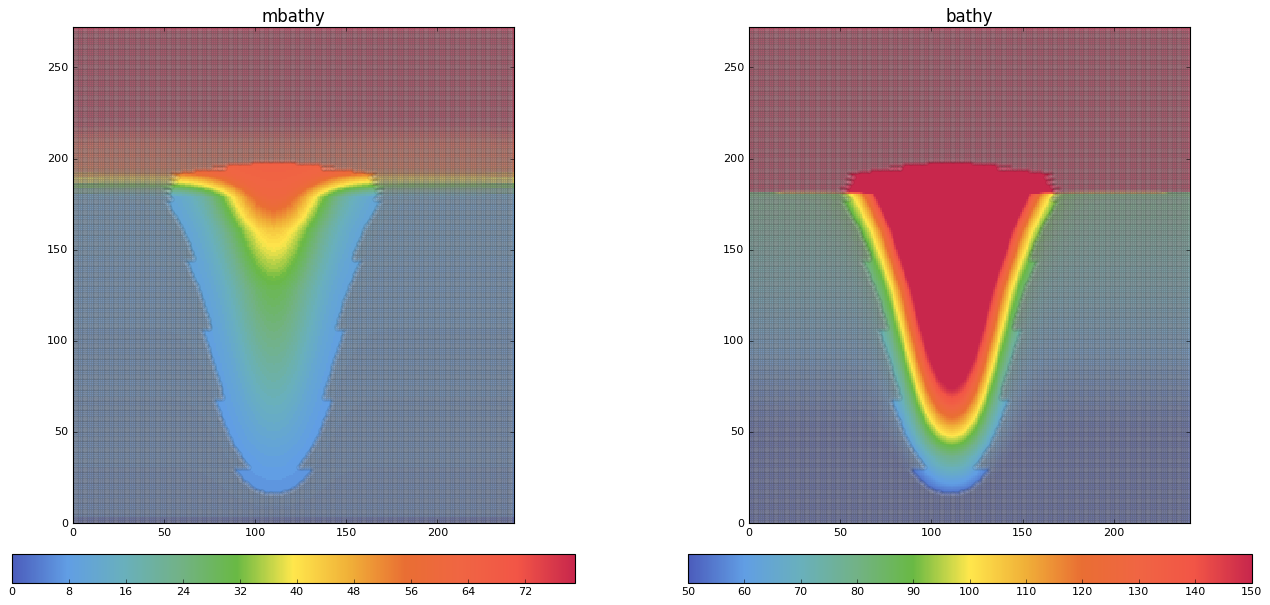

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 10))
p1 = ax1.pcolormesh(mbathy, cmap=cmap_iam)
p2 = ax2.pcolormesh(bathy, cmap=cmap_iam, vmin=50, vmax=150)
for ax, p, ttl, n in zip([ax1, ax2], [p1, p2], ['mbathy', 'bathy'], np.arange(2)):
    ax.set_xlim([0, mbathy.shape[-1]])
    ax.set_ylim([0, mbathy.shape[-2]])
    ax.scatter(xs, ys, c='w', alpha=0.1)
    fig.colorbar(p, ax=ax, orientation='horizontal', pad=0.05)
    ax.set_title(ttl, fontsize=15)
    ax.set_aspect(aspect='equal')

In [8]:
diff_value = 2
ys = np.where(mbathy_diff == diff_value)[0]
xs = np.where(mbathy_diff == diff_value)[1]

In [9]:
y_cut = 180

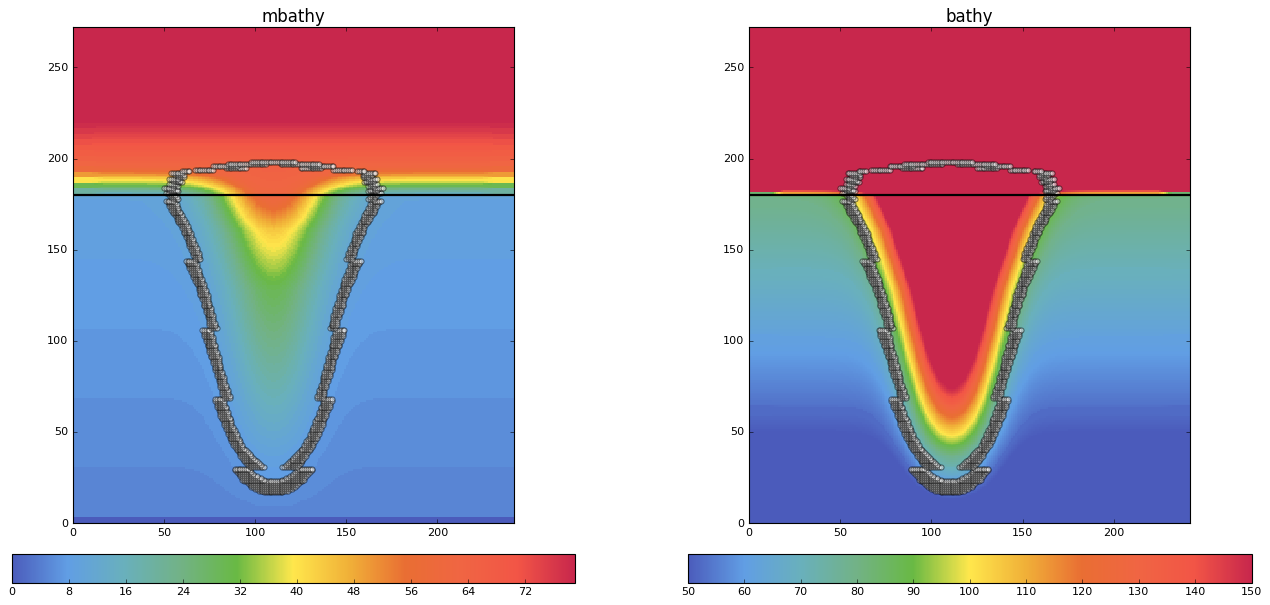

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 10))
p1 = ax1.pcolormesh(mbathy, cmap=cmap_iam)
p2 = ax2.pcolormesh(bathy, cmap=cmap_iam, vmin=50, vmax=150)
for ax, p, ttl, n in zip([ax1, ax2], [p1, p2], ['mbathy', 'bathy'], np.arange(2)):
    ax.set_xlim([0, mbathy.shape[-1]])
    ax.set_ylim([0, mbathy.shape[-2]])
    ax.scatter(xs, ys, c='w', alpha=0.5)
    fig.colorbar(p, ax=ax, orientation='horizontal', pad=0.05)
    ax.set_title(ttl, fontsize=15)
    ax.set_aspect(aspect='equal')
    ax.axhline(y_cut, linewidth=2, c='k')

In [11]:
inds_cut = np.where(ys > y_cut)[0]

xs_canyon = np.delete(xs, inds_cut)

ys_canyon = np.delete(ys, inds_cut)

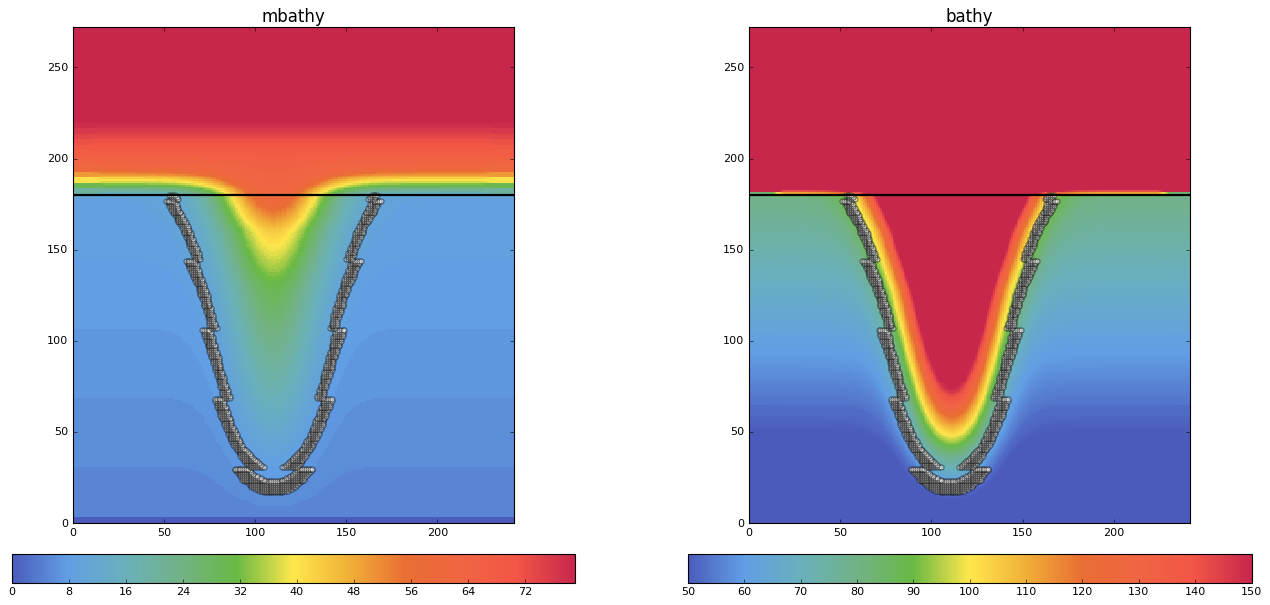

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 10))
p1 = ax1.pcolormesh(mbathy, cmap=cmap_iam)
p2 = ax2.pcolormesh(bathy, cmap=cmap_iam, vmin=50, vmax=150)
for ax, p, ttl, n in zip([ax1, ax2], [p1, p2], ['mbathy', 'bathy'], np.arange(2)):
    ax.set_xlim([0, mbathy.shape[-1]])
    ax.set_ylim([0, mbathy.shape[-2]])
    ax.scatter(xs_canyon, ys_canyon, c='w', alpha=0.5)
    fig.colorbar(p, ax=ax, orientation='horizontal', pad=0.05)
    ax.set_title(ttl, fontsize=15)
    ax.set_aspect(aspect='equal')
    ax.axhline(y_cut, linewidth=2, c='k')

(0, 272)

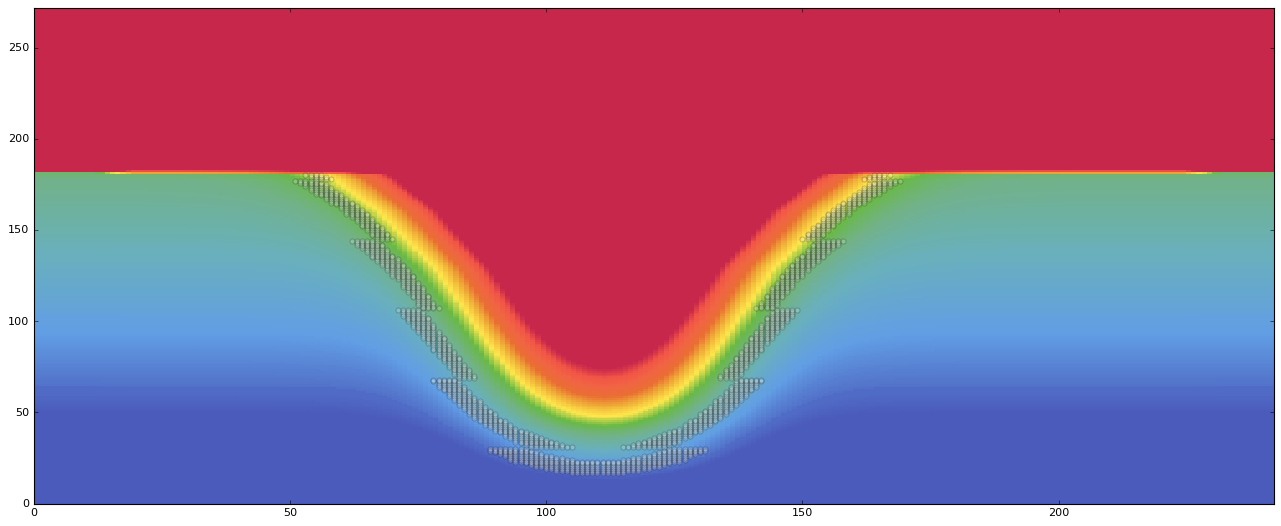

In [13]:
fig, ax = plt.subplots(1,1,figsize=(20, 8))
ax.pcolormesh(bathy, cmap=cmap_iam, vmin=50, vmax=150)
ax.scatter(xs_canyon, ys_canyon, c='w', alpha=0.2)
ax.set_xlim([0, mbathy.shape[-1]])
ax.set_ylim([0, mbathy.shape[-2]])

In [45]:
bathy_canyon = bathy[ys_canyon, xs_canyon]

In [46]:
bathy_canyon_mesh = np.full([mbathy.shape[0], mbathy.shape[1]], np.nan)
bathy_canyon_mesh[ys_canyon, xs_canyon] = bathy_canyon

In [47]:
mbathy_canyon = mbathy[ys_canyon, xs_canyon] - 1

In [48]:
mbathy_canyon_mesh = np.full([mbathy.shape[0], mbathy.shape[1]], np.nan)
mbathy_canyon_mesh[ys_canyon, xs_canyon] = mbathy_canyon

In [49]:
salt_day = np.mean(salt, axis=0)
salt_canyon = salt_day[mbathy_canyon, ys_canyon, xs_canyon]

In [50]:
salt_canyon_mesh = np.full([mbathy.shape[0], mbathy.shape[1]], np.nan)
salt_canyon_mesh[ys_canyon, xs_canyon] = salt_canyon

In [51]:
wvel_day = np.mean(wvel, axis=0)
wvel_canyon = wvel_day[mbathy_canyon, ys_canyon, xs_canyon]

In [52]:
wvel_canyon_mesh = np.full([mbathy.shape[0], mbathy.shape[1]], np.nan)
wvel_canyon_mesh[ys_canyon, xs_canyon] = wvel_canyon

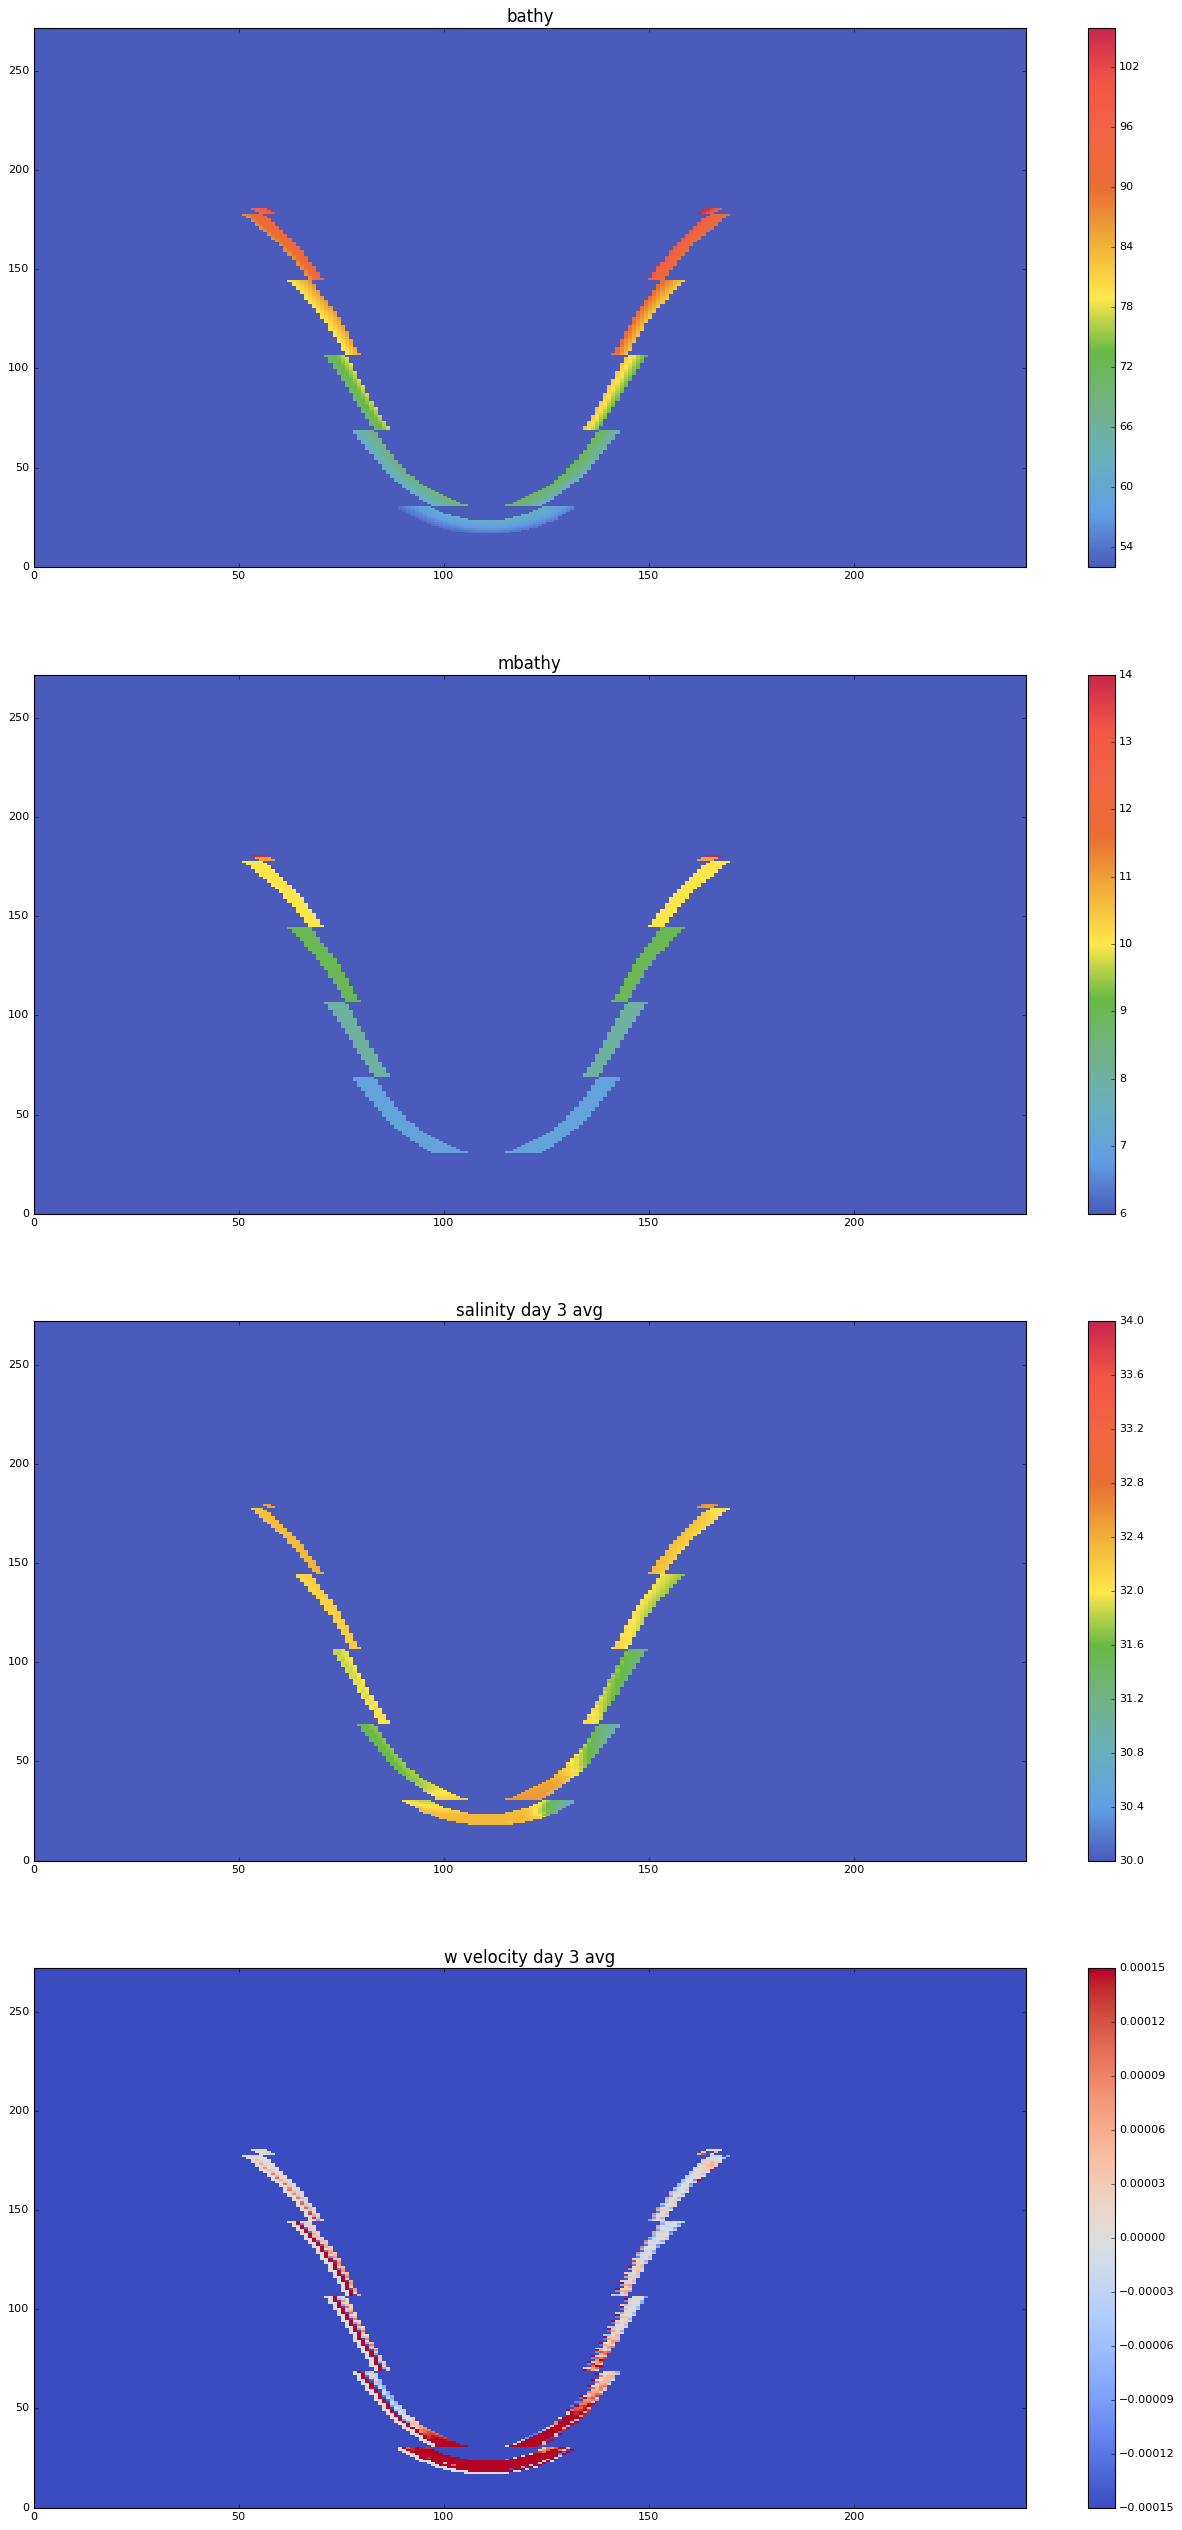

In [62]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(20, 40))
p1 = ax1.pcolormesh(bathy_canyon_mesh, cmap=cmap_iam, vmin=int(np.nanmin(bathy_canyon_mesh)), vmax=int(np.nanmax(bathy_canyon_mesh)))
p2 = ax2.pcolormesh(mbathy_canyon_mesh, cmap=cmap_iam, vmin=int(np.nanmin(mbathy_canyon_mesh)), vmax=int(np.nanmax(mbathy_canyon_mesh)))
p3 = ax3.pcolormesh(salt_canyon_mesh, cmap=cmap_iam, vmin=30, vmax=34)
p4 = ax4.pcolormesh(wvel_canyon_mesh, cmap=cm.coolwarm, vmin=-0.00015, vmax=0.00015)

ttls = ['bathy', 'mbathy', 'salinity day 3 avg', 'w velocity day 3 avg']
for ax, p, ttl, n in zip([ax1, ax2, ax3, ax4], [p1, p2, p3, p4], ttls, np.arange(4)):
    ax.set_xlim([0, mbathy.shape[-1]])
    ax.set_ylim([0, mbathy.shape[-2]])
    fig.colorbar(p, ax=ax, orientation='vertical', pad=0.05)
    ax.set_title(ttl, fontsize=15)